In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [3]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# sets up a foundation for us to build on in SQLAlchemy
Base = automap_base()
#reflect the schema from the tables to our code:
Base.prepare(engine, reflect=True)

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB to query data
session = Session(engine)

## Exploratory Climate Analysis

In [57]:
#Find the Date One Year Ago
prev_year = dt.date(2017, 8, 23)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#creating a variable to store the results of the query 
results = []
#extracts all of the results from our query and put them in a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#save our results as a DataFrame
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
#df.plot()

In [8]:
# summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Challenge
## Month of Jun

In [60]:
def month_prcp(month):
     return session.query(Measurement.date , Measurement.prcp).\
        filter(extract('month', Measurement.date)== month ).all()
    #extracts all of the results from our query and put them in a list
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
jun_df= pd.DataFrame(month_temp(6),  columns=['date','Jun precipitation'])
jun_df.set_index('date', inplace=True)
jun_df.tail()

,Jun precipitation
date,
2017-06-26,0.02
2017-06-27,0.10
2017-06-28,0.02
2017-06-29,0.04
2017-06-30,0.20


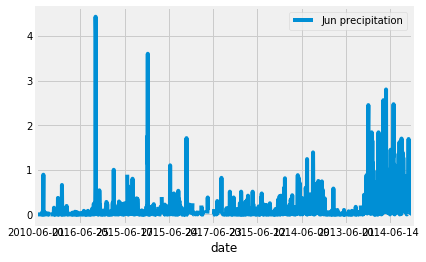

In [61]:
jun_df.plot()

In [62]:
Jun_summery=jun_df.describe().rename_axis('describe')
Jun_summery

,Jun precipitation
describe,
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## Month of July

In [63]:
#extracts all of the results from our query and put them in a list
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
july_df= pd.DataFrame(month_temp(7),  columns=['date','July precipitation'])
july_df.set_index('date', inplace=True)
july_df.tail()


,July precipitation
date,
2017-07-27,0.0
2017-07-28,0.4
2017-07-29,0.3
2017-07-30,0.3
2017-07-31,0.0


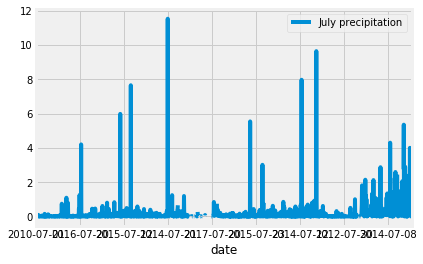

In [64]:
july_df.plot()

In [65]:
#Jun_df.describe()
July_summery=july_df.describe().rename_axis('describe')
July_summery

,July precipitation
describe,
count,1569.000000
mean,0.167922
std,0.625977
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,11.530000


## Month of December

In [66]:
#extracts all of the results from our query and put them in a list
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
dec_df= pd.DataFrame(month_temp(12),  columns=['date','Dec precipitation'])
#save our results as a DataFrame
#dec_df = pd.DataFrame(results, columns=['date','Dec precipitation'])
dec_df.set_index('date', inplace=True)
dec_df.tail()



,Dec precipitation
date,
2016-12-27,0.14
2016-12-28,0.14
2016-12-29,1.03
2016-12-30,2.37
2016-12-31,0.90


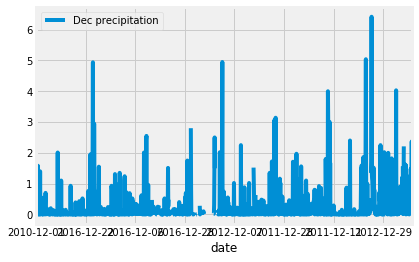

In [67]:
dec_df.plot()

## Comparison between July and Dec data

In [68]:
Dec_summery = dec_df.describe().rename_axis('describe')
summery= pd.merge(Dec_summery,  July_summery ,on=[ 'describe'])
summery

,Dec precipitation,July precipitation
describe,,
count,1405.000000,1569.000000
mean,0.216819,0.167922
std,0.541399,0.625977
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.030000,0.020000
75%,0.150000,0.120000
max,6.420000,11.530000


In [69]:
import matplotlib.pyplot as plt
plt.scatter(dec_df, date)

NameError: name 'date' is not defined

In [116]:
def month_temp(month):
     return session.query(Measurement.date,Measurement.tobs).\
        filter(extract('month', Measurement.date)== month ).all()
july_t= pd.DataFrame(month_temp(7),  columns=['date','tobs'])   
july_t.rename(columns={'tobs':'temp'}, inplace = True)
dec_t= pd.DataFrame(month_temp(12),  columns=['Date','tobs'])   
dec_t.rename(columns={'tobs':'temp',
                    'date': 'Date'}, inplace = True)

In [117]:
dec_t

,Date,temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [131]:
dec_t.temp.tolist()

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

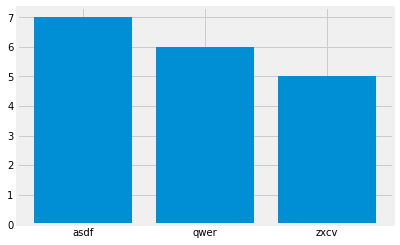

In [136]:
plt.bar(["asdf","qwer","zxcv"],[7,6,5])
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

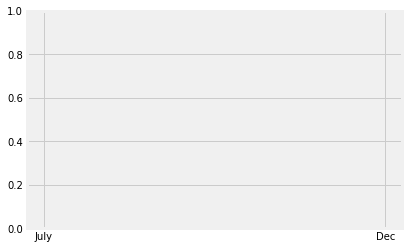

In [137]:
import matplotlib.pyplot 
x_axis = ["July", "Dec"]
#y_axis = dec_t.temp.tolist()
y_axis = [[1,2,3,4,5],[9,8,7,6,5]]
plt.bar(x_axis, y_axis)
plt.xlabel("months")
plt.ylabel("temp")
# Create a title.
plt.title("tempresure in F")
# Add the legend.
plt.legend()
plt.show()